# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previous numerical exercise.

Simulated Annealing algorithm uses the same principle of a Metropolis Algorithm: the current configuration is evolved through random moves to get progressively closer to a better solution. The probability distribution sampled is a Boltzmann probability of the loss function, which in this case is represented by the total length of the route: the move is accepted if a random variable $x \in [0,1)$ is lower than the exponential 
$$ x < e^{-\beta (L_{new} - L_{old})}$$

The system consists in a single route which evolves through randomly chosen mutations, with acceptance defined solely on the Boltzmann probability. By temperature obviously we do not intend the physical quantity, it simply represents the moltiplicative factor denominated this way in analogy with the distribution shape borrowed from statistical physics.

This method helps the system to improve its fitness, but on its own it hardly reaches stability. In order to prevent the system to escape the "valley" it has entered, the temperature is gradually lowered ($\beta \to \infty$) so that the system loses progressively freedom of movement, accepting only essential moves. This helps considering only the best routes, with various attempts of mutations and keeping only the essentials, but radically lowers the acceptance ratio: most attempts are rejected, making the process higly unefficient. The simplest solution is to increase the number of moves as the temperature decreases; a good, empirical tradeoff between speed of execution and accepted moves is to increase the number of mutation attempts as $N(\beta) = \beta^{3/2} \cdot N_0$, where $N_0 = 900$ the number of mutations for each generation in the GA. The results obtained follow:

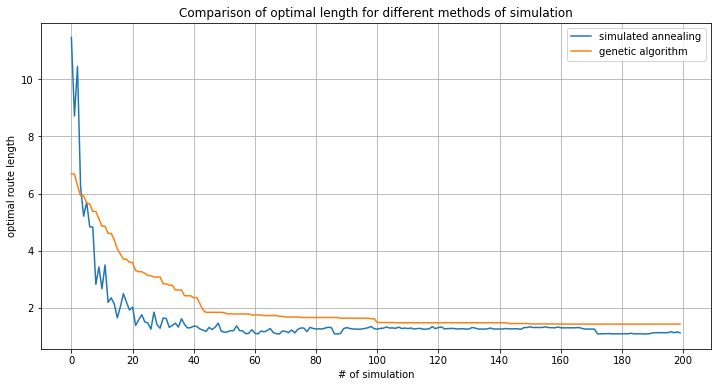

In [16]:
fig = plt.figure(figsize=[12,6])
beta, length = np.loadtxt("data_10_1/SA_STD.txt", unpack = True)
n_gen, best_length = np.loadtxt("data_10_1/fitness_comparison_square.txt", usecols=(0,1), unpack = True)

plt.plot(beta, length, label = "simulated annealing")
plt.plot (n_gen, best_length, label= "genetic algorithm")
plt.xlabel('# of simulation')
plt.ylabel('optimal route length')
plt.grid(True)
plt.legend()
xmarks=[i for i in range(0,200+1,20)]
plt.xticks(xmarks)
plt.title('Comparison of optimal length for different methods of simulation')
plt.show()

The graph compares (quite improperly, actually) the best result for the simulated annealing algorithm with the previous results from the genetic algorithm: the two progress based on different quantities ($\beta=\frac{1}{T^{\star}}$ for the SA, the number of generations for GA). It is still interesting to compare the optimal values that both present after the same number of iterations, since the number of operations of each are actually comparable. 

What matters now is to notice that not only the Simulated Annealing works, but almnost works better than a simple genetic algortigm as it is always able to improve. 

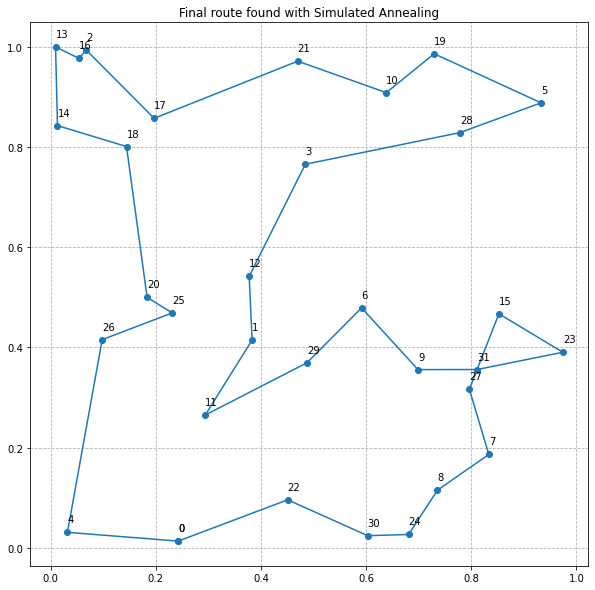

In [4]:
fig = plt.figure(figsize=[10,10])
cities_ind_1 = np.loadtxt("data_10_1/city_coordinates.txt", usecols=(0), dtype = int, unpack = True)
cities_coord_1 = np.loadtxt("data_10_1/city_coordinates.txt", usecols=(1,2), unpack = True)
best_sequence_1 = np.loadtxt("data_10_1/final_route.txt", dtype=int, unpack=True)
best_sequence_1=np.append(best_sequence_1, best_sequence_1[0])
plt.plot(cities_coord_1[0][best_sequence_1],cities_coord_1[1][best_sequence_1],'-o')

for i,txt in enumerate (best_sequence_1):
    plt.annotate(txt, (cities_coord_1[0][txt], cities_coord_1[1][txt]),
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 #ha='left')
                )
plt.grid(linestyle='--')
plt.title("Final route found with Simulated Annealing")
plt.show()

We see here the optimal route found with simulated annealing: to the eye it may seem very similar to the previous result, if not worse for some details; however, the previous comparison states how it is actually better, even considering the sort of jumble on the lower right. It is actually interesting to consider that particular aspect as it shows the peculiarities of the SA: by acting only with mutations and progressively reducing the number of accepted moves missteps of this kind might be common: it may converge to an efficient route, but the possibility of improvement is evident. 

A crossing of the kind would be easily solved by a larger population, so even though this time SA outperformed GA the two processes could actually be used together to improve the general solution. The SA is in fact able to quickly exit possible local minima with *outlandish* moves, while the GA selects, generation after generation, the best partial solution to be passed on. A possible improvement could be found by having a GA progress for a number of generations; when the optimal length tends to stabilize about a minimum, the SA is introduced to *spice things up* and search for possible improvements, to be stabilised afterwards by other GA moves. This possible combination would in fact take the best qualities of both while diminishing the defects.

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

A possible alternative to the combination of GA and SA is given by a parallel search of the best route. 4 GAs are launched at the same time, each indipendent from the others, but every 20 generations the best routes of each populations migrate to the other continents, to add an *outside perspective* to the  other populations. The destination of the migration is chosen at random, with the guarantee that each continent receives a migrant. 

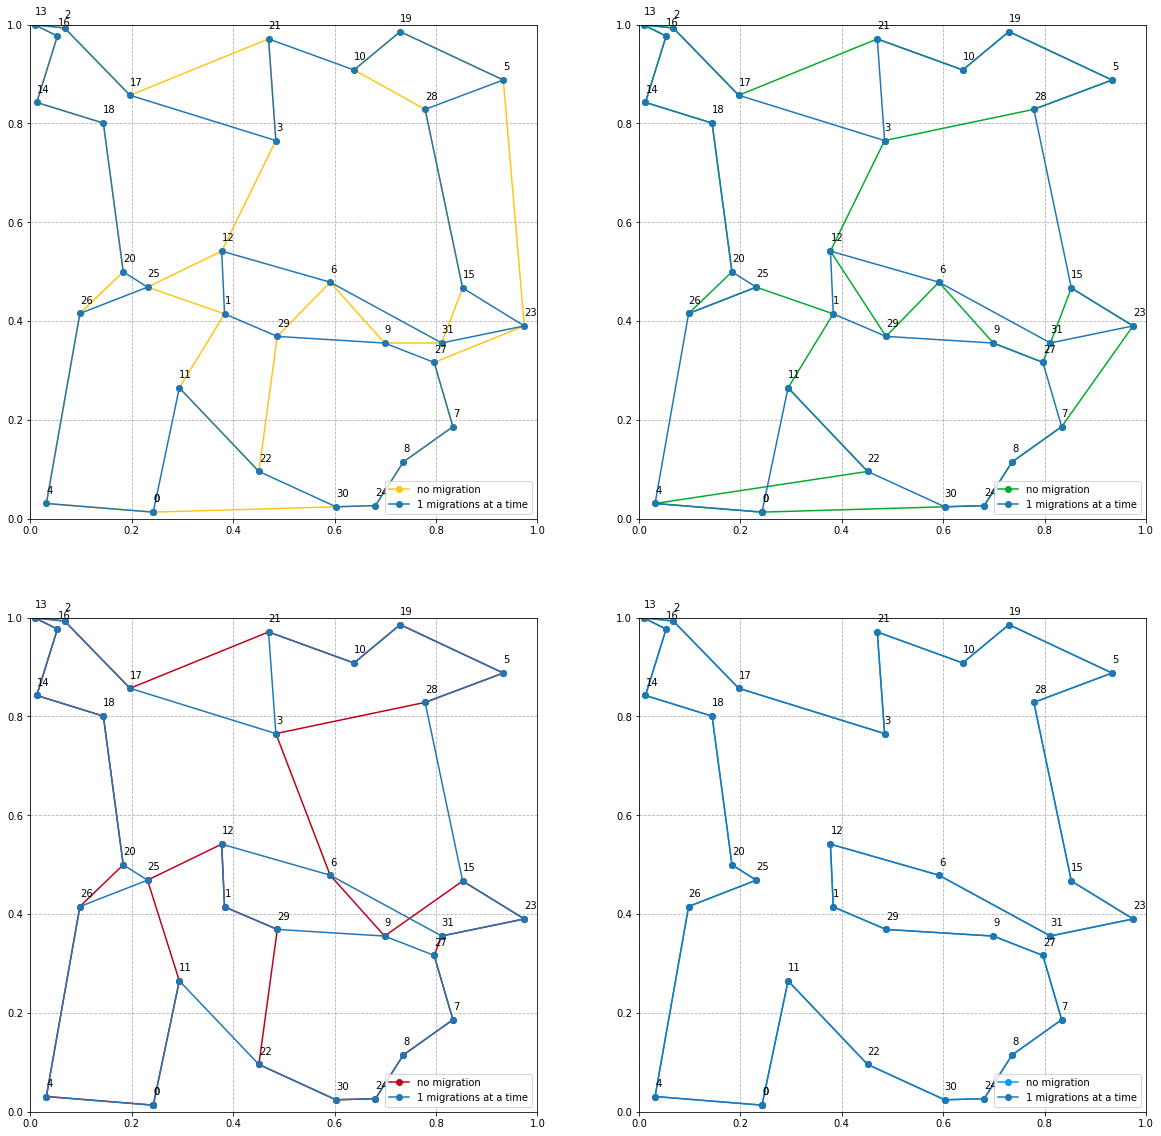

In [7]:
fig,axs = plt.subplots(2,2,figsize=[20,20])
color_=[ "xkcd:golden yellow", "xkcd:kelly green", "xkcd:scarlet","xkcd:azure"]

cities_ind = np.loadtxt("data_10_2/city_coordinates_0.txt", usecols=(0), dtype = int, unpack = True)
cities_coord = np.loadtxt("data_10_2/city_coordinates_0.txt", usecols=(1,2), unpack = True)
k=0
for i in range (2):
    for j in range (2):
        best_sequence = np.loadtxt("data_10_2/best_route"+str(k)+".txt", dtype=int, unpack=True)
        best_sequence=np.append(best_sequence, best_sequence[0])
        axs[i][j].plot(cities_coord[0][best_sequence],cities_coord[1][best_sequence],'-o', c=color_[k], label = "no migration")
        best_sequence = np.loadtxt("data_10_2/best_route"+str(k)+"_mig_1.txt", dtype=int, unpack=True)
        best_sequence=np.append(best_sequence, best_sequence[0])
        axs[i][j].plot(cities_coord[0][best_sequence],cities_coord[1][best_sequence],'-o', label= "1 migrations at a time")
        axs[i][j].legend()
        for m,txt in enumerate (best_sequence):
            axs[i][j].annotate(txt, (cities_coord[0][txt], cities_coord[1][txt]),
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 #ha='left')
                )
    
        axs[i][j].set_xlim([0,1])
        axs[i][j].set_ylim([0,1])
        axs[i][j].grid(linestyle='--')  
        k+=1
plt.show()

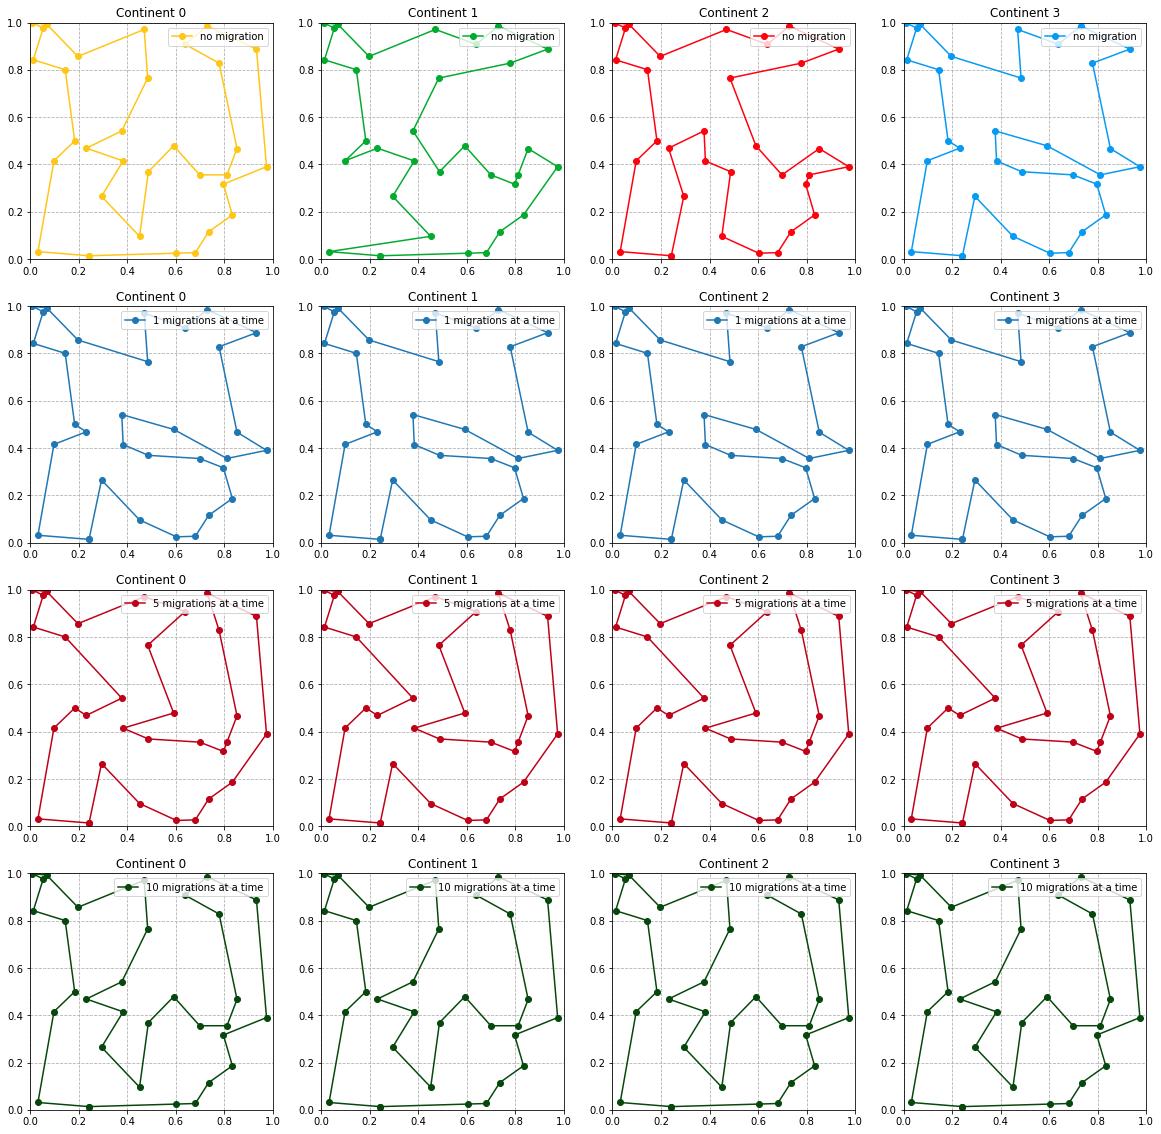

In [9]:
fig,axs = plt.subplots(4,4,figsize=[20,20])
color_=[ "xkcd:golden yellow", "xkcd:kelly green", "xkcd:bright red","xkcd:azure"]

cities_ind = np.loadtxt("data_10_2/city_coordinates_0.txt", usecols=(0), dtype = int, unpack = True)
cities_coord = np.loadtxt("data_10_2/city_coordinates_0.txt", usecols=(1,2), unpack = True)
for j in range (4):
    best_sequence = np.loadtxt("data_10_2/best_route"+str(j)+".txt", dtype=int, unpack=True)
    best_sequence=np.append(best_sequence, best_sequence[0])
    axs[0][j].plot(cities_coord[0][best_sequence],cities_coord[1][best_sequence],'-o', c=color_[j], label = "no migration")
    
    best_sequence = np.loadtxt("data_10_2/best_route"+str(j)+"_mig_1.txt", dtype=int, unpack=True)
    best_sequence=np.append(best_sequence, best_sequence[0])
    axs[1][j].plot(cities_coord[0][best_sequence],cities_coord[1][best_sequence],'-o', label= "1 migrations at a time")
    
    best_sequence = np.loadtxt("data_10_2/best_route"+str(j)+"_mig_5.txt", dtype=int, unpack=True)
    best_sequence=np.append(best_sequence, best_sequence[0])
    axs[2][j].plot(cities_coord[0][best_sequence],cities_coord[1][best_sequence],'-o', c='xkcd:scarlet',label= "5 migrations at a time")
    
    best_sequence = np.loadtxt("data_10_2/best_route"+str(j)+"_mig_10.txt", dtype=int, unpack=True)
    best_sequence=np.append(best_sequence, best_sequence[0])
    axs[3][j].plot(cities_coord[0][best_sequence],cities_coord[1][best_sequence],'-o', c='xkcd:forest green',label= "10 migrations at a time")
    for i in range (4):
        axs[i][j].legend()
        axs[i][j].set_xlim([0,1])
        axs[i][j].set_ylim([0,1])
        axs[i][j].grid(linestyle='--') 
        axs[i][j].set_title('Continent '+str(j)) 
plt.show()

The graphs show the best route in each continent after 200 generations, comparing the results of the continents indipendently (coloured) with the evolution with the addition of various numbers of migrants. We can see right away that when migrations occur, the best route is the same across all continents, which corresponds exaclty to the best of one particular continent. The other routes are certainly an adequate solution due to the high deceneracy of the problem, but still result inferior to the ones obtained including some sort of migration.

This method represents another way to introduce variations to a population other than simulated annealing. It may need more resources to run, as each continent needs a full population to converge to an optimum, but overall its speed is greater since it all happens in parallel and last just as long as a single simulation would. In order to weight the pros and cons of this method, we compare in the following graph the progressive fitness obtained by the simulations.

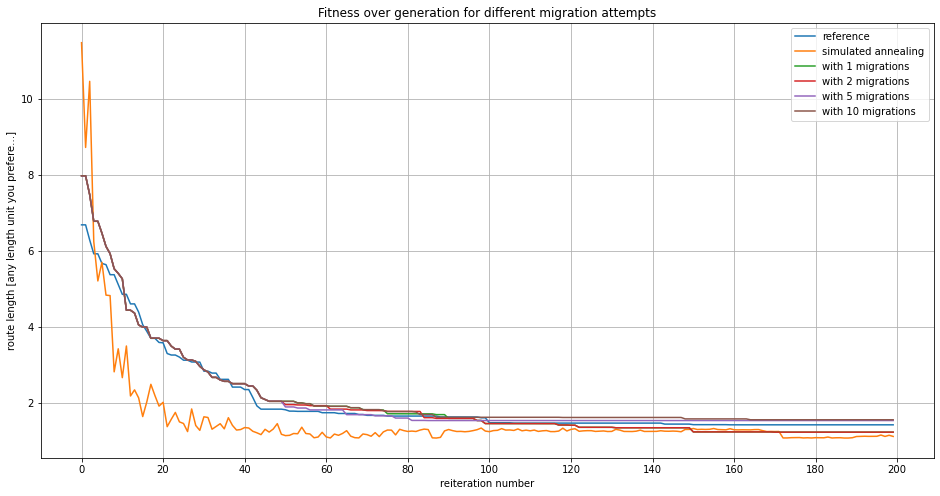

In [15]:
fig = plt.figure (figsize=[16,8])
plt.title('Fitness over generation for different migration attempts')
n_gen, best_length = np.loadtxt("data_10_1/fitness_comparison_square.txt", usecols=(0,1), unpack = True)
plt.plot (n_gen, best_length, label = "reference")
plt.plot(beta, length, label = "simulated annealing")


migs = [1,2,5,10]
for j in range (1):
    for i in migs:
    #n_gen, best_length = np.loadtxt("10_2/fitness_comparison_"+str(i)+".txt", usecols=(0,1), unpack = True)
    #plt.plot(n_gen, best_length, label = "continent number "+str(i))
        n_gen, best_length = np.loadtxt("data_10_2/fitness_comparison_"+str(j)+"_mig_"+str(i)+".txt", usecols=(0,1), unpack = True)
        plt.plot(n_gen, best_length, label = "with "+str(i)+" migrations")

        
xmarks=[i for i in range(0,200+1,20)]
plt.xticks(xmarks)
        
plt.grid(True)
plt.xlabel('reiteration number')
plt.ylabel('route length [any length unit you prefere…]')
plt.legend()
plt.show()

The graph compares the optimal route length over the number of generations for simulations with a different number of migrants each time. We can see that the speed of convergence is quite similar for all systems: what is more relevant to notice is that there is an effective improvement only for $N<5$ migrants each migration step. By adding too many fit elements, the system tends to stall in local minima instead of exploring other new configurations: the benefits of "hearing advices from the outside" results simply in following blindly that advice, leading to stalling all continents in the same minimum. On the other hand, by adding just a couple of new elements each time, the population explores new possibilities and exits the local well without getting too contaminated and simply ending up in another well.

Still, the comparison with the SA over reiterations shows how that method helps to speed-up convergence maybe even more than parallel execution. A simulation which contains both these elements would certainly benefit both in speed and optimised solution.